<a href="https://colab.research.google.com/github/rlatpwls7337/git_test/blob/main/Simple_ITK_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/FlashChoi5657/Deepnoid-Education.git

Cloning into 'Deepnoid-Education'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 556 (delta 42), reused 175 (delta 8), pack-reused 333
Receiving objects: 100% (556/556), 156.41 MiB | 15.80 MiB/s, done.
Resolving deltas: 100% (109/109), done.
Checking out files: 100% (332/332), done.


In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 233 kB/s 


In [ ]:
import SimpleITK as sitk
import numpy as np
import os
import matplotlib.pyplot as plt

#### data load 및 확인

In [ ]:
image_2d = sitk.Image(64, 64, sitk.sitkFloat32)

In [ ]:
print(image_2d)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


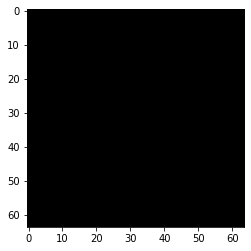

In [ ]:
img_npy = sitk.GetArrayFromImage(image_2d)

print(img_npy)
plt.imshow(img_npy, cmap='gray')
plt.show()

In [ ]:
path = os.path.join('.','Deepnoid-Education/dataset')
filelist = os.listdir(path)
filelist

['MRI', 'xray_abd_chest', 'test.dcm', 'lung_cancer', 'test2.dcm']

In [ ]:
dcm = sitk.ReadImage('./Deepnoid-Education/dataset/test2.dcm')
print(dcm)

In [ ]:
arr = sitk.GetArrayFromImage(dcm)
arr.shape

(1, 2978, 2300)

In [ ]:
plt.imshow(arr, cmap='gray')
plt.show()

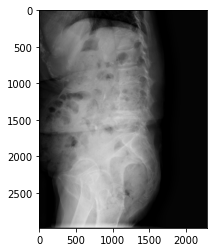

In [ ]:
arr = np.squeeze(arr) # 길이가 1인 축 제거
plt.imshow(arr, cmap='gray')
# plt.axis('off')
plt.show()

#### Dicom tags
https://www.dicomlibrary.com/dicom/dicom-tags/


In [ ]:
for key in dcm.GetMetaDataKeys():
  value = dcm.GetMetaData(key)
  print(key, value)

In [ ]:
arr.dtype

dtype('uint16')

#### Threshold

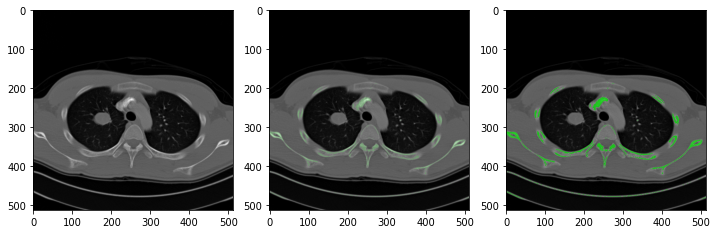

In [ ]:
lung = sitk.ReadImage('./Deepnoid-Education/dataset/test.dcm')
lung_arr = sitk.GetArrayFromImage(lung)
threshold = 500 # 500, 250
th_img = lung>threshold
CT_255 = sitk.Cast(sitk.RescaleIntensity(lung), sitk.sitkUInt8)
overlay = sitk.GetArrayFromImage(sitk.LabelOverlay(CT_255, th_img, opacity=0.2))
overlay1 = sitk.GetArrayFromImage(sitk.LabelOverlay(CT_255, th_img, opacity=0.8))

fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(lung_arr[0], cmap='gray')
plt.subplot(132)
plt.imshow(overlay[0], cmap='gray')
plt.subplot(133)
plt.imshow(overlay1[0], cmap='gray')
fig.tight_layout()
plt.show()

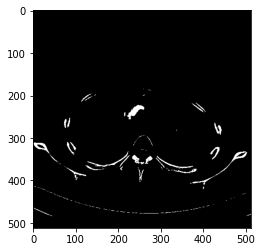

In [ ]:
th_arr = sitk.GetArrayFromImage(th_img)
plt.imshow(th_arr[0], cmap='gray')
plt.show()

In [ ]:
# SimpleITK 라이브러리의 사용이 심플하지는 않습니다. 라이브러리 안에 여러 함수들이 있고
# 그 함수들을 불러와서 사용할 때도 여러 설정 값이 필요합니다.
# 설정을 마치고 Execute로 실행해야 합니다.

def series_load(path):
    dicoms = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(path)
    reader = sitk.ImageSeriesReader() 
    reader.LoadPrivateTagsOn() 
    reader.MetaDataDictionaryArrayUpdateOn()
    reader.SetFileNames(dicoms)
    image3D = reader.Execute()

    return image3D

In [ ]:
for a, b, c in os.walk(path, topdown=True):
  print(a,b,c)

./Deepnoid-Education/dataset ['MRI', 'xray_abd_chest', 'lung_cancer'] ['test.dcm', 'test2.dcm']
./Deepnoid-Education/dataset/MRI ['37908.000000-T2reg-21119', '11.000000-T1post-80644', '34907.000000-T1prereg-43695', '5388.000000-MaskTumor-63335', '35623.000000-FLAIRreg-79237'] ['readme.md']
./Deepnoid-Education/dataset/MRI/37908.000000-T2reg-21119 [] ['1-22.dcm', '1-20.dcm', '1-14.dcm', '1-17.dcm', '1-06.dcm', '1-01.dcm', '1-11.dcm', '1-03.dcm', '1-16.dcm', '1-12.dcm', '1-23.dcm', '1-24.dcm', '1-04.dcm', '1-19.dcm', '1-02.dcm', '1-09.dcm', '1-05.dcm', '1-18.dcm', '1-08.dcm', '1-21.dcm', '1-07.dcm', '1-15.dcm', '1-13.dcm', '1-10.dcm']
./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644 [] ['1-22.dcm', '1-20.dcm', '1-14.dcm', '1-17.dcm', '1-06.dcm', '1-01.dcm', '1-11.dcm', '1-03.dcm', '1-16.dcm', '1-12.dcm', '1-23.dcm', '1-24.dcm', '1-04.dcm', '1-19.dcm', '1-02.dcm', '1-09.dcm', '1-05.dcm', '1-18.dcm', '1-08.dcm', '1-21.dcm', '1-07.dcm', '1-15.dcm', '1-13.dcm', '1-10.dcm']
./Deepnoid-

In [ ]:
mri_series = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644')
print(mri_series)

In [ ]:
mri_arr = sitk.GetArrayFromImage(mri_series)
print(mri_arr.shape)

(24, 320, 260)


In [ ]:
axes=[]
fig = plt.figure(figsize=(15,30))
for i in range(24):
  axes.append(fig.add_subplot(6,4,i+1))
  plt.imshow(mri_arr[i], cmap='gray')
fig.tight_layout()
plt.show()

In [ ]:
def display(array):
  axes=[]
  fig = plt.figure(figsize=(20,20))
  for i in range(24):
    axes.append(fig.add_subplot(6,4,i+1))
    plt.imshow(array[i], cmap='gray')
  fig.tight_layout()
  plt.show()

#### Min-Max normalization

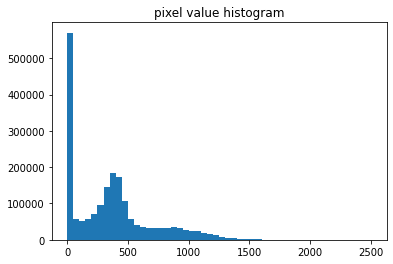

In [ ]:
plt.hist(mri_arr.flatten(), bins=50)
plt.title("pixel value histogram")
plt.show()

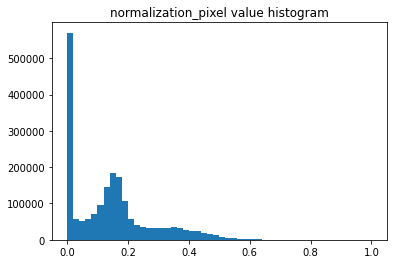

In [ ]:
# Min-Max scaling

mri_arr_norm = (mri_arr - np.min(mri_arr)) / (np.max(mri_arr) - np.min(mri_arr))
plt.hist(mri_arr_norm.flatten(), bins=50)
plt.title("normalization_pixel value histogram")
plt.show()

#### 픽셀 간격 조정

In [ ]:
mri_series = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644')
print(mri_series.GetSize(), mri_series.GetSpacing())
rate = 2 # rate = 0.5

resamplefilter = sitk.ResampleImageFilter()
resamplefilter.SetInterpolator(sitk.sitkLinear) #sitk.sitkNearestNeighbor, sitk.sitkBSpline, sitk.sitkGaussian
resamplefilter.SetOutputDirection(mri_series.GetDirection())
resamplefilter.SetOutputOrigin(mri_series.GetOrigin())

x, y, z = mri_series.GetSpacing()
resamplefilter.SetOutputSpacing((x*rate, y*rate, z))

width, height, depth = mri_series.GetSize()
resamplefilter.SetSize((width//rate, height//rate, depth))
new_img = resamplefilter.Execute(mri_series)
print(new_img.GetSize(), new_img.GetSpacing())

(260, 320, 24) (0.6875, 0.6875, 6.499999911226572)
(130, 160, 24) (1.375, 1.375, 6.499999911226572)


In [ ]:
new_series_arr = sitk.GetArrayFromImage(new_img)
new_series_arr.shape

(24, 160, 130)

In [ ]:
display(new_series_arr)

In [ ]:
mri_series_T2 = series_load('./Deepnoid-Education/dataset/MRI/37908.000000-T2reg-21119')
T2_arr = sitk.GetArrayFromImage(mri_series_T2)
print(mri_series_T2.GetSize(), mri_series_T2.GetSpacing())

(260, 320, 24) (0.6875, 0.6875, 6.499999911226572)


In [ ]:
# Resample
def resample_array(sitk_image, spacing, interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [spacing, spacing, spacing]
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in
                zip(original_size, original_spacing, new_spacing)]
    sitk_image = sitk.Resample(sitk_image, new_size, sitk.Transform(), interpolator, 
                               sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

resampled_img = resample_array(mri_series_T2, 1)

In [ ]:
print(resampled_img.GetSize(), resampled_img.GetSpacing())

(179, 220, 156) (1.0, 1.0, 1.0)


In [ ]:
display(sitk.GetArrayFromImage(resampled_img))

In [ ]:
re_arr = sitk.GetArrayFromImage(resampled_img)
# axial_arr = np.transpose(re_arr, (1,2,0))  # sagittal to axial
axial_arr = np.transpose(re_arr, (1, 0, 2))
axial_arr = np.fliplr(axial_arr)
print(axial_arr.shape)
axes=[]
fig = plt.figure(figsize=(20,20))
for i in range(24):
  axes.append(fig.add_subplot(6,4,i+1))
  plt.imshow(axial_arr[30+3*i], cmap='gray')
fig.tight_layout()
plt.show()

#### 리사이즈

In [ ]:
# Resize
def resize_array(sitk_image, size,interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [(ospc * osz / nsz) for osz, ospc, nsz in
                   zip(original_size, original_spacing, size)]
    sitk_image = sitk.Resample(sitk_image, size, sitk.Transform(), interpolator, 
                               sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

In [ ]:
resize_img = resize_array(mri_series_T2, (512,512,24))
resize_img.GetSize(), resize_img.GetSpacing()

((512, 512, 24), (0.34912109375, 0.4296875, 6.499999911226571))

In [ ]:
display(sitk.GetArrayFromImage(resize_img))

#### MRI 여러 시퀀스를 하나의 데이터로 만드는 방법

In [ ]:
os.listdir('./Deepnoid-Education/dataset/MRI')

['readme.md',
 '37908.000000-T2reg-21119',
 '11.000000-T1post-80644',
 '34907.000000-T1prereg-43695',
 '5388.000000-MaskTumor-63335',
 '35623.000000-FLAIRreg-79237']

In [ ]:
case3_t1 = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644')
case3_t2 = series_load('./Deepnoid-Education/dataset/MRI/37908.000000-T2reg-21119')

print(case3_t1.GetSize(), case3_t2.GetSize())


In [ ]:
t1_arr = sitk.GetArrayFromImage(case3_t1)
t2_arr = sitk.GetArrayFromImage(case3_t2)

t1_arr = np.expand_dims(t1_arr, axis=-1)
t2_arr = np.expand_dims(t2_arr, axis=-1)

print(t1_arr.shape, t2_arr.shape)

case3_arr = np.concatenate((t1_arr,t2_arr), -1)

print(case3_arr.shape)

(24, 320, 260, 1) (24, 320, 260, 1)
(24, 320, 260, 2)


#### label data 확인

In [ ]:
label = series_load('./Deepnoid-Education/dataset/MRI/5388.000000-MaskTumor-63335')
label.GetSize()

(260, 320, 24)

In [ ]:
display(sitk.GetArrayFromImage(label))

In [ ]:
label_arr = sitk.GetArrayFromImage(label)
print(np.unique(label_arr, return_counts=True))

(array([0, 1], dtype=uint16), array([1989991,    6809]))


In [ ]:
os.getcwd()

'/content'

In [ ]:
sitk.WriteImage(label, './CT_label.nii.gz')

#### dicom & label check

In [ ]:
dicom = sitk.ReadImage('./Deepnoid-Education/dataset/data.nii.gz')
dicom = sitk.GetArrayFromImage(dicom)
print(dicom.shape)

nifti = sitk.ReadImage('./Deepnoid-Education/dataset/label.nii.gz')
nifti = sitk.GetArrayFromImage(nifti)
print(nifti.shape)

(96, 512, 512)
(96, 512, 512)


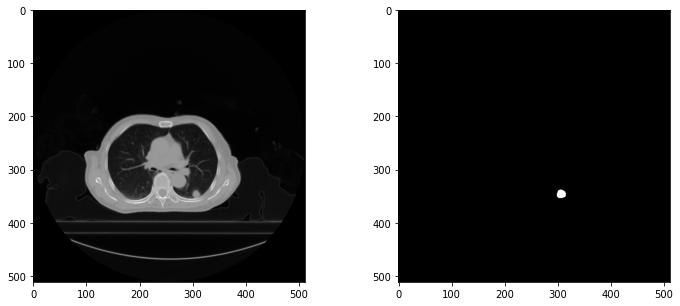

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(dicom[48], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(nifti[48], cmap='gray')